In [16]:
from pathlib import Path

import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [46]:
notebook_path = Path.cwd()
base_dir = notebook_path.parent
DATA_DIR = Path(base_dir, "data")
RESULTS_DIR = Path(base_dir, "results")
USERS_RESULTS_DIR = RESULTS_DIR / "new_users"
CRM_DIR = RESULTS_DIR / "crm_vision.npy"

In [4]:
for file in USERS_RESULTS_DIR.iterdir():
    print(file.name)

y_user_register.pkl


In [5]:
with open(USERS_RESULTS_DIR / "y_user_register.pkl", "rb") as handle:
    user_0 = pickle.load(handle)

In [7]:
user_0.keys()

dict_keys(['name', 'age', 'phone', 'id', 'accept', 'embedding', 'meta_data'])

In [10]:
user_0["meta_data"].head()

,bbox,kps,det_score,embedding,img_crop,object_id
0,"[6.24979, 148.51067, 283.24338, 391.80115]","[[74.77441, 289.79147], [141.51141, 203.86217]...",0.780612,"[1.4641294, -0.2904917, -0.51384056, -1.474182...","[[[255, 0, 0], [255, 0, 0], [255, 0, 0], [255,...",y
0,"[46.965485, 69.306755, 267.01147, 363.32507]","[[104.24528, 175.20576], [204.46999, 158.96526...",0.838565,"[0.82798713, 0.41853964, -0.48365688, -0.92659...","[[[255, 0, 0], [255, 0, 0], [255, 0, 0], [255,...",y
0,"[92.38343, 10.616865, 301.14502, 315.73337]","[[162.43445, 106.405945], [265.446, 122.466255...",0.881713,"[1.5079774, 0.03840311, -0.7112375, -1.5739868...","[[[255, 0, 0], [255, 0, 0], [255, 0, 0], [255,...",y
0,"[40.90312, 59.13681, 248.32535, 349.52118]","[[100.541245, 149.88593], [198.52565, 149.6605...",0.869529,"[1.6566097, 0.9483535, -0.7279175, -1.2799654,...","[[[255, 0, 0], [255, 0, 0], [255, 0, 0], [255,...",y
0,"[45.66614, 50.296707, 250.87753, 336.86237]","[[105.49444, 146.22064], [201.99934, 143.25182...",0.871750,"[1.6560742, 0.92227185, -0.4902786, -1.2543739...","[[[255, 0, 0], [255, 0, 0], [255, 0, 0], [255,...",y


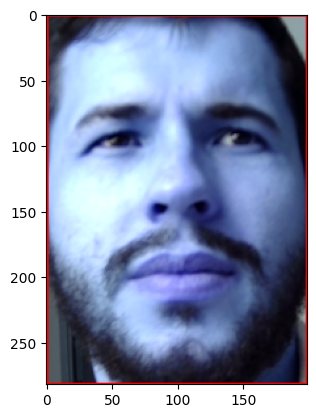

In [14]:
img = user_0["meta_data"]["img_crop"].values[10]
plt.imshow(img)

In [47]:
# load crm ddbb

crm_data = np.load(CRM_DIR, allow_pickle=True) 

In [48]:
df_crm = pd.DataFrame.from_records(crm_data)

In [50]:
df_crm

,name,age,phone,id,accept,embedding
0,c,c,c,c,y,"[0.37499154, 1.7205943, 0.3692099, -1.060687, ..."
1,David,26,3127423350,1036669382,y,"[0.57541543, 1.2896473, 0.46030876, -0.6006214..."


In [53]:
for file in USERS_RESULTS_DIR.iterdir():
    print(file.name)

y_user_register.pkl
1036669382_26-12-2022-18-58-01_user_register.pkl
c_time_register_user_register.pkl
1036669382_user_register.pkl


In [54]:
id_search = df_crm["id"].values[0]
with open(USERS_RESULTS_DIR / "1036669382_26-12-2022-18-58-01_user_register.pkl", "rb") as handle:
    user = pickle.load(handle)

In [55]:
user.keys()

dict_keys(['name', 'age', 'phone', 'id', 'accept', 'embedding', 'meta_data'])

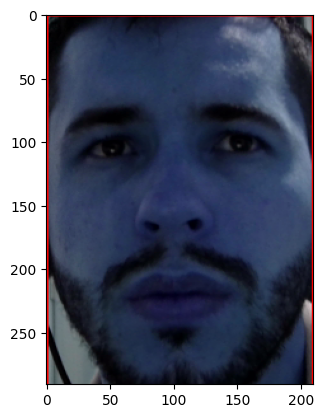

In [56]:
img = user["meta_data"]["img_crop"].values[10]
plt.imshow(img)

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity(user_0["embedding"]["embedding"][0].reshape(1, -1), user["embedding"].reshape(1, -1)))

[[0.7737222]]
